In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Работа с данными агрегатора такси. В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов.

In [2]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [3]:
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID поездки
2. **Trip_Distance**: Расстояние опездки по первоначальному запросу клиента
3. **TypeofCab**: Категория такси, запрошенная клиентом
4. **CustomerSinceMonths**: С какого месяца клиент использует сервис. 0 - с текущего
5. **LifeStyleIndex**: Внутренний индекс сервиса стиля жизни клиента, исходя из внутренних данных
6. **ConfidenceLifeStyle_Index**: Категория отражающая уверенность   индекса LifeStyleIndex
7. **Destination_Type**: Один из 14 типов финальной точки. Внутренняя сегментация сервиса
8. **Customer_Rating**: Средний рейтинг сервиса клиентом
9. **CancellationLast1Month**: Количество отмененных клиентом поездок за последний месяц
10. **Var1**, **Var2** and **Var3**: Скрытые категориальные переменные, которые могут быть использованы для моделирования
11. **Gender**: Пол клиента

**SurgePricingType**: Целевая переменная - 3 класса


### EDA


In [4]:
# заполнение NA (медианным значением для числовых)
df.isna().sum()

,0
Trip_Distance,0
Type_of_Cab,20210
Customer_Since_Months,5920
Life_Style_Index,20193
Confidence_Life_Style_Index,20193
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,71030
Var2,0


In [5]:
df['Customer_Since_Months'].describe()

,Customer_Since_Months
count,125742.000000
mean,6.016661
std,3.626887
min,0.000000
25%,3.000000
50%,6.000000
75%,10.000000
max,10.000000


In [6]:
df['Customer_Since_Months'] = df['Customer_Since_Months'].fillna(df['Customer_Since_Months'].median())

In [7]:
df['Life_Style_Index'].describe()

,Life_Style_Index
count,111469.000000
mean,2.802064
std,0.225796
min,1.596380
25%,2.654730
50%,2.798050
75%,2.946780
max,4.875110


<Axes: ylabel='Life_Style_Index'>

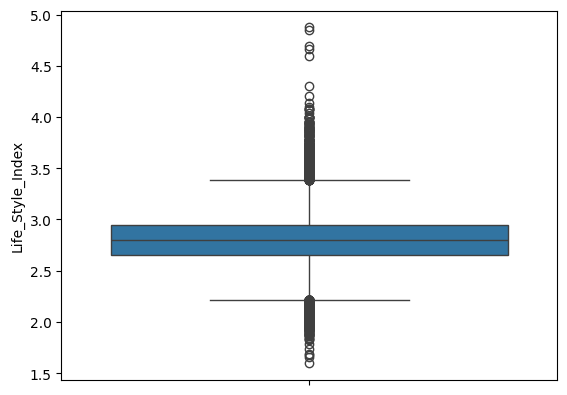

In [8]:
sns.boxplot(df['Life_Style_Index'])

In [9]:
df['Life_Style_Index'].fillna(df['Life_Style_Index'].median()).describe()

,Life_Style_Index
count,131662.000000
mean,2.801448
std,0.207765
min,1.596380
25%,2.687952
50%,2.798050
75%,2.912815
max,4.875110


In [10]:
df['Life_Style_Index'] = df['Life_Style_Index'].fillna(df['Life_Style_Index'].median())

In [11]:
df['Var1'].describe()

,Var1
count,60632.000000
mean,64.202698
std,21.820447
min,30.000000
25%,46.000000
50%,61.000000
75%,80.000000
max,210.000000


<Axes: ylabel='Var1'>

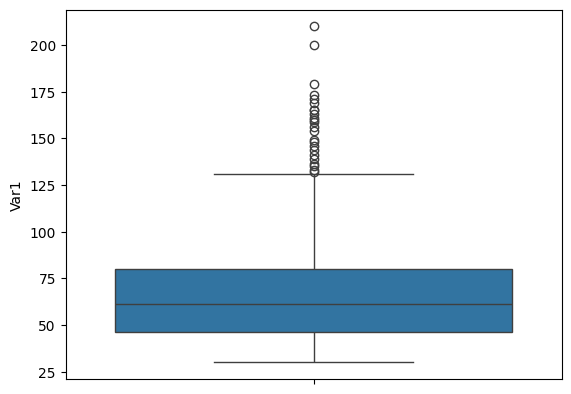

In [12]:
sns.boxplot(df['Var1'])

In [13]:
sum(df['Var1']>175)

3

In [14]:
df = df[(df['Var1'] < 175) | df['Var1'].isna()]

In [15]:
df.shape

(131659, 13)

In [16]:
df['Var1'].describe()

,Var1
count,60629.000000
mean,64.196160
std,21.800992
min,30.000000
25%,46.000000
50%,61.000000
75%,80.000000
max,173.000000


In [17]:
df['Var1'].fillna(df['Var1'].median()).describe()
# здесь std сильно меняется, принято решение замены NA средним значением

,Var1
count,131659.000000
mean,62.471833
std,14.879652
min,30.000000
25%,61.000000
50%,61.000000
75%,61.000000
max,173.000000


In [18]:
df['Var1'] = df['Var1'].fillna(df['Var1'].mean())

In [19]:
df.isna().sum()

,0
Trip_Distance,0
Type_of_Cab,20210
Customer_Since_Months,0
Life_Style_Index,0
Confidence_Life_Style_Index,20192
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,0
Var2,0


In [20]:
# замена каегориальных пропусков наиболее популярным
df['Type_of_Cab'].value_counts()

,count
Type_of_Cab,
B,31134
C,28121
A,21569
D,18991
E,11634


In [21]:
df['Type_of_Cab'].fillna('B').value_counts()

,count
Type_of_Cab,
B,51344
C,28121
A,21569
D,18991
E,11634


In [22]:
df['Confidence_Life_Style_Index'].value_counts()

,count
Confidence_Life_Style_Index,
B,40354
C,35966
A,35147


In [23]:
df['Confidence_Life_Style_Index'].fillna('B').value_counts()

,count
Confidence_Life_Style_Index,
B,60546
C,35966
A,35147


In [24]:
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].fillna('B')
df['Type_of_Cab'] = df['Type_of_Cab'].fillna('B')

In [25]:
df.isna().sum()

,0
Trip_Distance,0
Type_of_Cab,0
Customer_Since_Months,0
Life_Style_Index,0
Confidence_Life_Style_Index,0
Destination_Type,0
Customer_Rating,0
Cancellation_Last_1Month,0
Var1,0
Var2,0


In [26]:
df.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131659.000000,131659.000000,131659.000000,131659.000000,131659.000000,131659.000000,131659.000000,131659.000000,131659.000000
mean,44.201304,6.015874,2.801448,2.849446,0.782856,64.196160,51.202873,75.098877,2.155751
std,25.523035,3.544434,0.207767,0.980682,1.037564,14.794124,4.986173,11.578217,0.738162
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.687945,2.152500,0.000000,64.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,64.196160,50.000000,74.000000,2.000000
75%,60.735000,10.000000,2.912830,3.582500,1.000000,64.196160,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,173.000000,124.000000,206.000000,3.000000


In [27]:
df.info()
# проверка типов данных

<class 'pandas.core.frame.DataFrame'>
Index: 131659 entries, T0005689460 to T0005908514
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131659 non-null  float64
 1   Type_of_Cab                  131659 non-null  object 
 2   Customer_Since_Months        131659 non-null  float64
 3   Life_Style_Index             131659 non-null  float64
 4   Confidence_Life_Style_Index  131659 non-null  object 
 5   Destination_Type             131659 non-null  object 
 6   Customer_Rating              131659 non-null  float64
 7   Cancellation_Last_1Month     131659 non-null  int64  
 8   Var1                         131659 non-null  float64
 9   Var2                         131659 non-null  int64  
 10  Var3                         131659 non-null  int64  
 11  Gender                       131659 non-null  object 
 12  Surge_Pricing_Type           131659 non-null  in

In [28]:
# эти данные не могут быть не целыми
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype('int16')
df['Cancellation_Last_1Month'] = df['Cancellation_Last_1Month'].astype('int16')

In [29]:
numerical = df.describe().columns
numerical = numerical.delete(-1)
numerical

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'],
      dtype='object')

In [30]:
categorical = df.describe(include='object').columns
categorical

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

<Axes: >

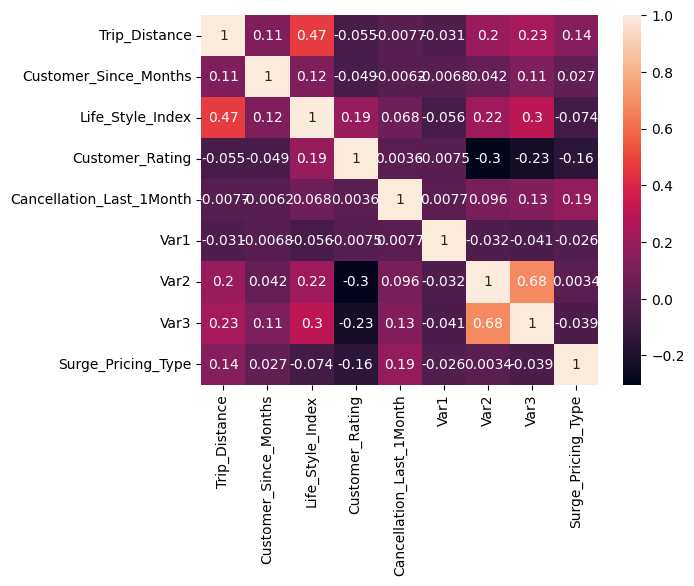

In [31]:
# матрица корреляций числовых переменных
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [32]:
# топ5 пар самых коррелированных признаков
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [33]:
get_top_abs_correlations(df[numerical], 5)
# сильной корреляции нет

,,0
Var2,Var3,0.683459
Trip_Distance,Life_Style_Index,0.468336
Life_Style_Index,Var3,0.303334
Customer_Rating,Var2,0.302964
Trip_Distance,Var3,0.231717


In [34]:
# Квазиконстантность
from sklearn.feature_selection import VarianceThreshold
variance = VarianceThreshold(threshold=1)
variance.fit_transform(df[numerical])
variance.get_feature_names_out()

array(['Trip_Distance', 'Customer_Since_Months',
       'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'], dtype=object)

In [35]:
numerical
# 'Life_Style_Inde' и 'Customer_Rating' - признаки с низкой дисперсией. Пока будем считать, что все признаки важны для модели.

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3'],
      dtype='object')

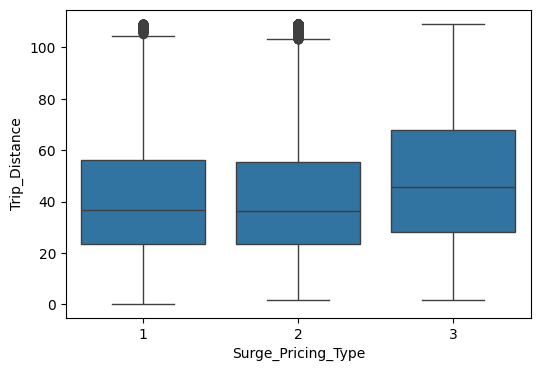

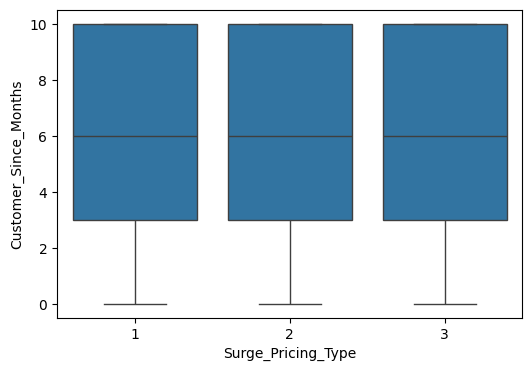

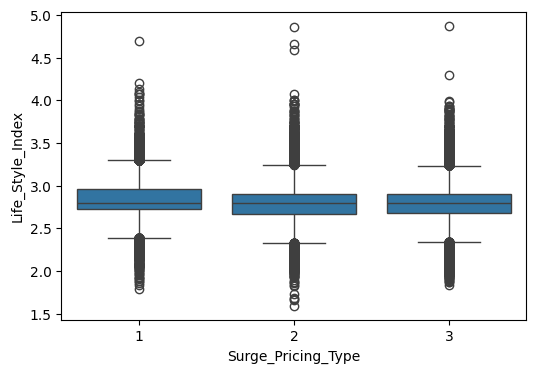

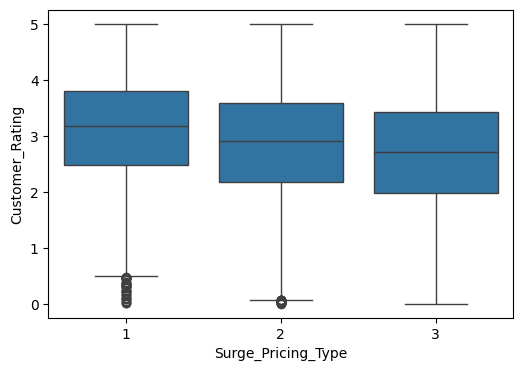

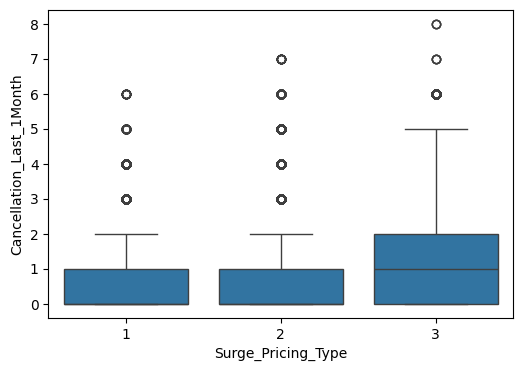

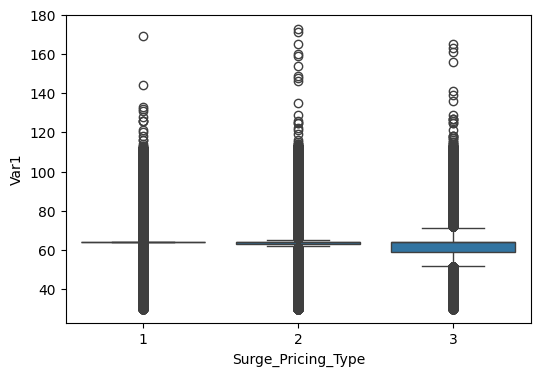

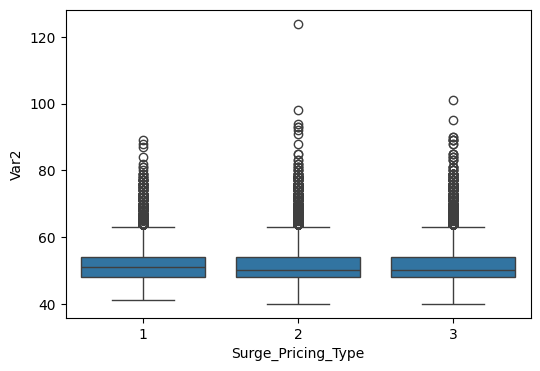

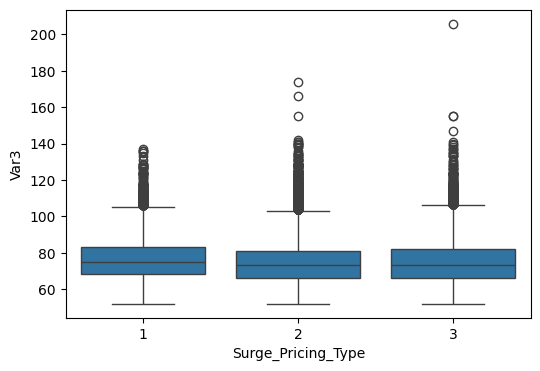

In [36]:
# ящики с усами для числовых признаков
for col in numerical:
    fig = plt.figure()
    fig.set_size_inches(6, 4)
    sns.boxplot(y=col, x=df['Surge_Pricing_Type'].astype('category'), data=df)
    plt.show()
# 'Customer_Since_Months' нет различий, принято решение удалить признак
# Var2 небольшие различия

In [37]:
df = df.drop(['Customer_Since_Months'], axis = 1)

In [38]:
numerical = numerical.drop('Customer_Since_Months')

In [39]:
df.head()

,Trip_Distance,Type_of_Cab,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,
T0005689460,6.77,B,2.42769,A,A,3.90500,0,40.00000,46,60,Female,2
T0005689461,29.47,B,2.78245,B,A,3.45000,0,38.00000,56,78,Male,2
T0005689464,41.58,B,2.79805,B,E,3.50125,2,64.19616,56,77,Male,2
T0005689465,61.56,C,2.79805,B,A,3.45375,0,64.19616,52,74,Male,3
T0005689467,54.95,C,3.03453,B,A,3.40250,4,51.00000,49,102,Male,2


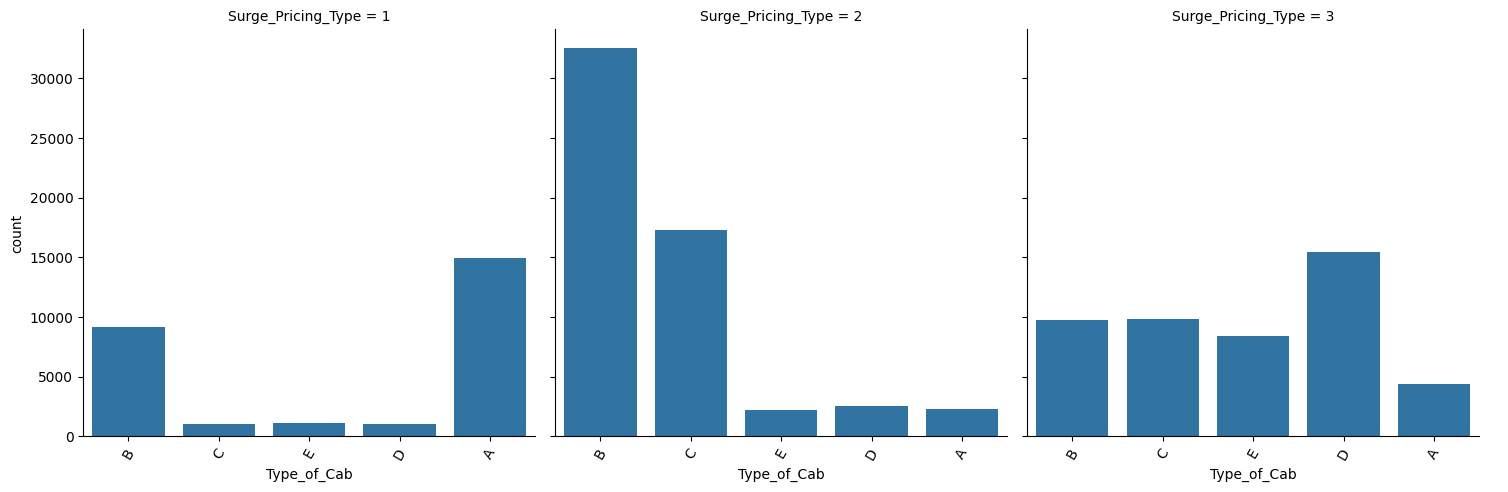

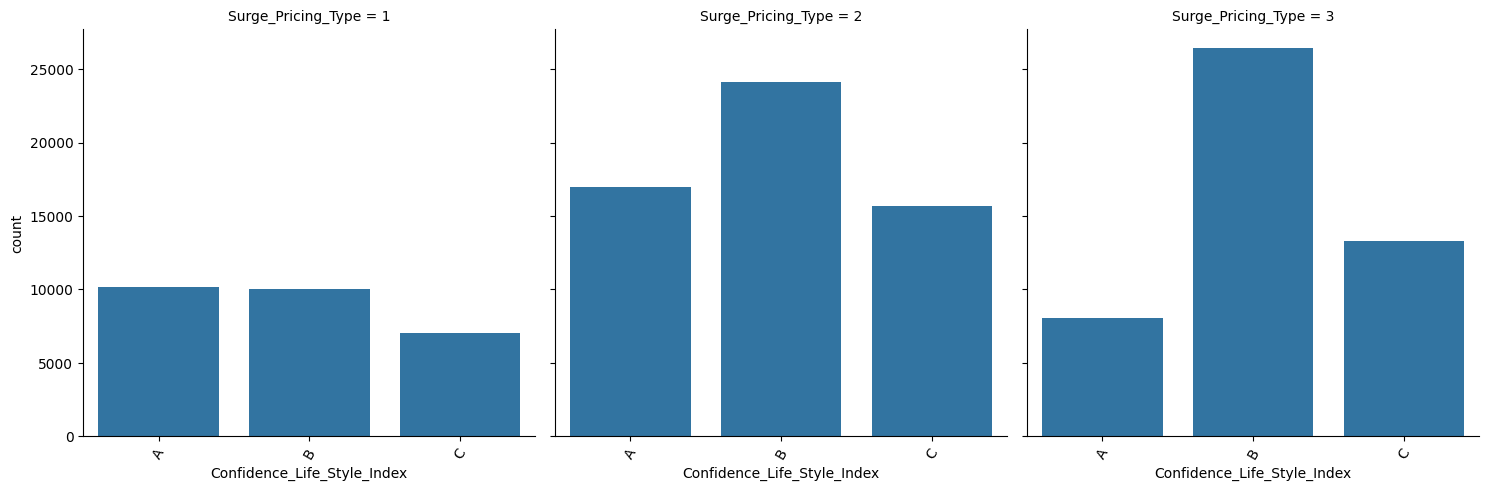

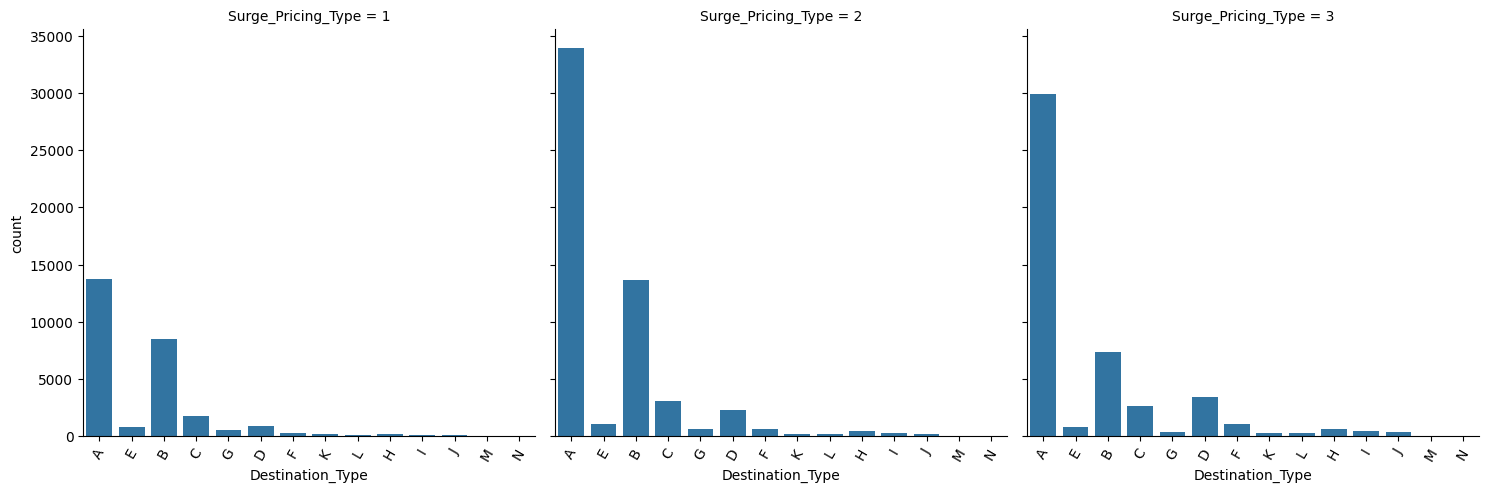

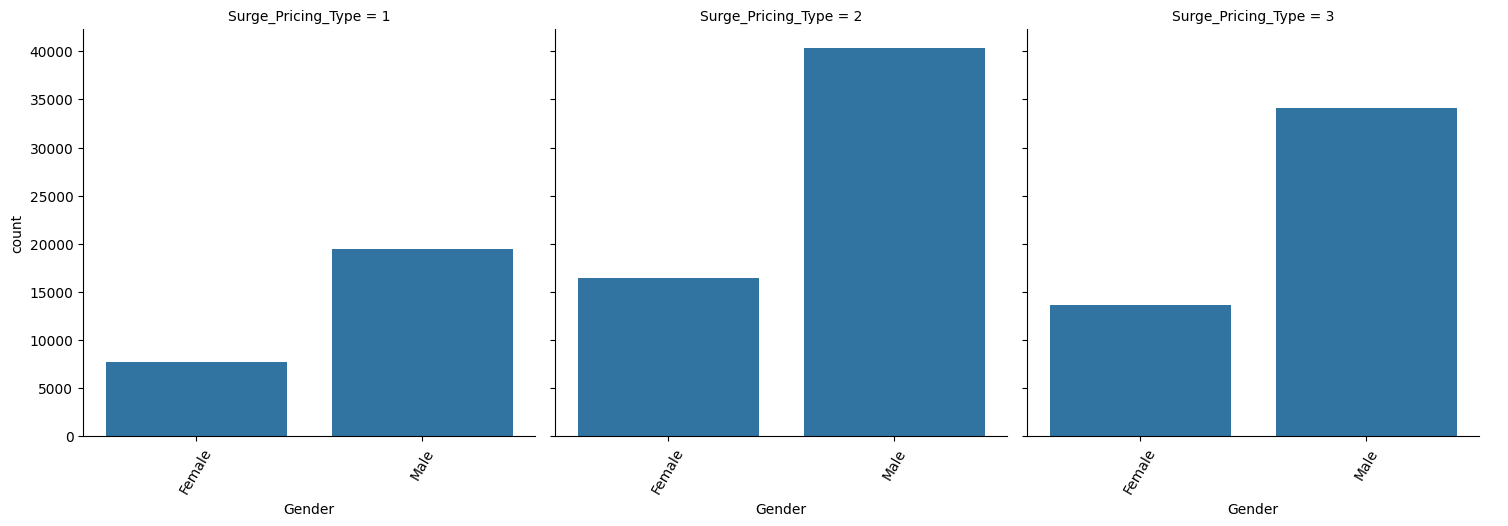

In [ ]:
# ищем разнообразия для категориальных переменных
for col in categorical:
    g = sns.catplot(x=col, kind='count', col=df['Surge_Pricing_Type'], data=df)
    g.set_xticklabels(rotation=60)
# все переменные различаются для разных признаков

In [41]:
# выделяем признаки и таргет
X = df.drop('Surge_Pricing_Type', axis=1)
Y = df['Surge_Pricing_Type']

In [42]:
X

,Trip_Distance,Type_of_Cab,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
Trip_ID,,,,,,,,,,,
T0005689460,6.77,B,2.42769,A,A,3.90500,0,40.00000,46,60,Female
T0005689461,29.47,B,2.78245,B,A,3.45000,0,38.00000,56,78,Male
T0005689464,41.58,B,2.79805,B,E,3.50125,2,64.19616,56,77,Male
T0005689465,61.56,C,2.79805,B,A,3.45375,0,64.19616,52,74,Male
T0005689467,54.95,C,3.03453,B,A,3.40250,4,51.00000,49,102,Male
...,...,...,...,...,...,...,...,...,...,...,...
T0005908509,11.72,D,2.74229,A,A,3.28500,0,61.00000,47,76,Male
T0005908510,74.81,C,2.81059,C,A,0.44500,0,64.19616,63,88,Male
T0005908512,40.17,C,2.99565,B,A,3.33625,0,64.19616,48,75,Female


In [43]:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# OneHotEncoder и TargetEncoder для категориальных переменных
# (в зависимости от кол-ва уникальных значений)

ohe = []
mte = []

for col in categorical:
  if df[col].nunique() <= 4:
    ohe.append(col)
  else:
    mte.append(col)

In [44]:
categorical

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

In [45]:
mte

['Type_of_Cab', 'Destination_Type']

In [46]:
transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ohe),
    ('mte', TargetEncoder(), mte)],
    remainder='passthrough')

In [47]:
transformer.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Confidence_Life_Style_Index', 'Gender']),
                                ('mte', TargetEncoder(),
                                 ['Type_of_Cab', 'Destination_Type'])])

In [48]:
X_transformed = transformer.fit_transform(X, Y)

In [49]:
X_transformed
# проверка: 7 цифровых, 2 ohe 2 mte

,ohe__Confidence_Life_Style_Index_B,ohe__Confidence_Life_Style_Index_C,ohe__Gender_Male,mte__Type_of_Cab_1,mte__Type_of_Cab_2,mte__Type_of_Cab_3,mte__Destination_Type_1,mte__Destination_Type_2,mte__Destination_Type_3,remainder__Trip_Distance,remainder__Life_Style_Index,remainder__Customer_Rating,remainder__Cancellation_Last_1Month,remainder__Var1,remainder__Var2,remainder__Var3
Trip_ID,,,,,,,,,,,,,,,,
T0005689460,0.0,0.0,0.0,0.178328,0.632419,0.189252,0.177475,0.436677,0.385848,6.77,2.42769,3.90500,0,40.00000,46,60
T0005689461,1.0,0.0,1.0,0.178328,0.632419,0.189252,0.177475,0.436677,0.385848,29.47,2.78245,3.45000,0,38.00000,56,78
T0005689464,1.0,0.0,1.0,0.177398,0.633019,0.189581,0.300084,0.408533,0.291368,41.58,2.79805,3.50125,2,64.19616,56,77
T0005689465,1.0,0.0,1.0,0.037374,0.615021,0.347599,0.177080,0.437451,0.385470,61.56,2.79805,3.45375,0,64.19616,52,74
T0005689467,1.0,0.0,1.0,0.037944,0.615107,0.346943,0.177234,0.437057,0.385709,54.95,3.03453,3.40250,4,51.00000,49,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0005908509,0.0,0.0,1.0,0.056761,0.131742,0.811490,0.177214,0.436445,0.386341,11.72,2.74229,3.28500,0,61.00000,47,76
T0005908510,0.0,1.0,1.0,0.036475,0.613728,0.349791,0.177116,0.437569,0.385314,74.81,2.81059,0.44500,0,64.19616,63,88
T0005908512,1.0,0.0,0.0,0.036714,0.614561,0.348720,0.177214,0.436445,0.386341,40.17,2.99565,3.33625,0,64.19616,48,75


### Training

In [50]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test  = train_test_split(X_transformed, Y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=2022)

Обучение One-vs-Rest Logreg, подсчет метрик

In [78]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_rest", OneVsRestClassifier(LogisticRegression(class_weight='balanced')))])
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_rest',
                 OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced')))])

In [79]:
from sklearn.metrics import classification_report

OneVSRestLogreg1 = classification_report(Y_test, pipe.predict(X_test), digits=3)
print(classification_report(Y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.688     0.566     0.621      5389
           2      0.643     0.809     0.717     11276
           3      0.735     0.586     0.652      9667

    accuracy                          0.678     26332
   macro avg      0.689     0.654     0.663     26332
weighted avg      0.686     0.678     0.673     26332



Подбор оптимальных гиперпараметров модели с помощью `GridSearchCV()`


In [80]:
param_grid = {'one_vs_all__estimator__penalty': ['l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(LogisticRegression(class_weight='balanced')))])
grid = GridSearchCV(pipe, param_grid, scoring=accuracy_score)
grid.fit(X_train, Y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_all',
                                        OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced')))]),
             param_grid={'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1],
                         'one_vs_all__estimator__penalty': ['l2',
                                                            'elasticnet']},
             scoring=<function accuracy_score at 0x7e1af5865080>)

In [82]:
print(grid.best_params_)

{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}


In [83]:
OneVSRestGrid2 = classification_report(Y_test, grid.predict(X_test), digits=3)
print(classification_report(Y_test, grid.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.689     0.564     0.620      5389
           2      0.642     0.815     0.718     11276
           3      0.738     0.580     0.649      9667

    accuracy                          0.677     26332
   macro avg      0.689     0.653     0.663     26332
weighted avg      0.687     0.677     0.673     26332



Калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest


In [84]:
proba = grid.predict_proba(X_test)

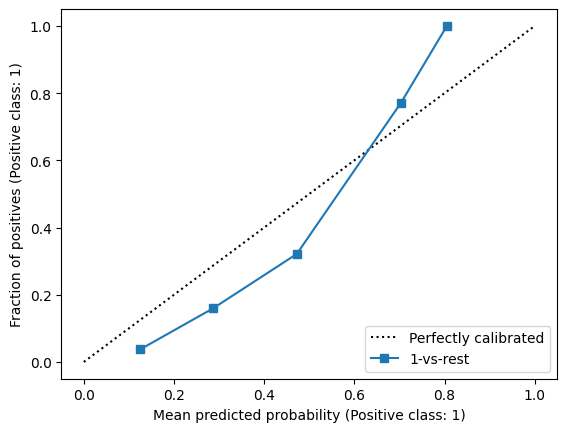

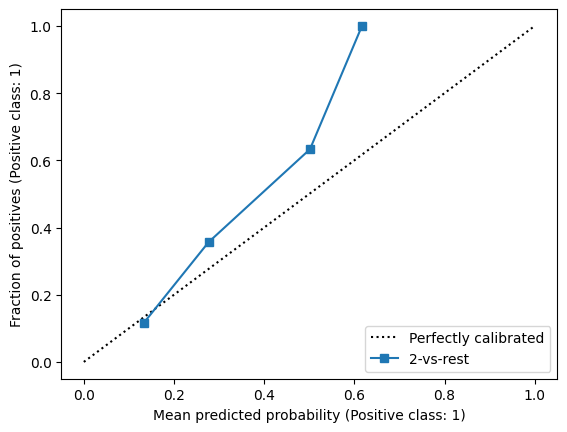

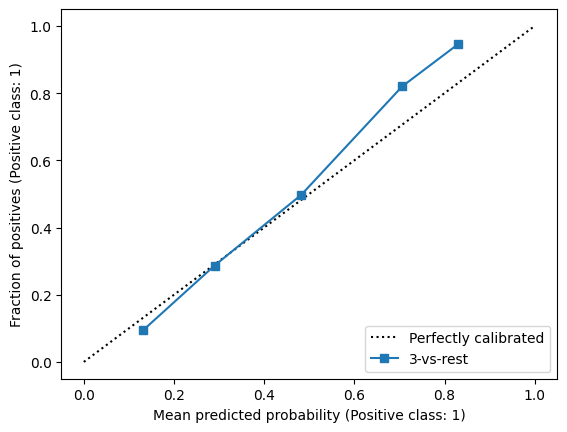

In [85]:
from sklearn.calibration import CalibrationDisplay

for i in [1, 2, 3]:
  Y_true = (Y_test == i)
  Y_prob = proba[:, i-1]
  CalibrationDisplay.from_predictions(Y_true, Y_prob, name=f'{i}-vs-rest')

One-vs-One `SGDClassifier`

In [96]:
X_train, X_test, y_train, y_test  = train_test_split(X_transformed, Y,
                                                     test_size=0.2,
                                                     shuffle=True,
                                                     random_state=2022)

In [97]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

pipe_ovo = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_one", OneVsOneClassifier(SGDClassifier()))])

pipe_ovo.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_one', OneVsOneClassifier(estimator=SGDClassifier()))])

In [98]:
OneVSOne4 = classification_report(y_test, pipe_ovo.predict(X_test), digits=3)
print(classification_report(y_test, pipe_ovo.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.730     0.537     0.619      5389
           2      0.627     0.879     0.732     11276
           3      0.782     0.531     0.632      9667

    accuracy                          0.681     26332
   macro avg      0.713     0.649     0.661     26332
weighted avg      0.705     0.681     0.672     26332



Подбор оптимальных гиперпараметров модели с помощью `GridSearchCV()` с перебором функций потерь.

In [99]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [100]:
grid = GridSearchCV(pipe_ovo, param_grid, scoring=accuracy_score)
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('one_vs_one',
                                        OneVsOneClassifier(estimator=SGDClassifier()))]),
             param_grid={'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1],
                         'one_vs_one__estimator__loss': ['hinge', 'log',
                                                         'modified_huber'],
                         'one_vs_one__estimator__penalty': ['l1', 'l2']},
             scoring=<function accuracy_score at 0x7e1af5865080>)

In [101]:
print(grid.best_params_)

{'one_vs_one__estimator__alpha': 0.001, 'one_vs_one__estimator__loss': 'hinge', 'one_vs_one__estimator__penalty': 'l1'}


In [102]:
OneVSOneGrid5 = classification_report(Y_test, grid.predict(X_test), digits=3)
print(classification_report(Y_test, grid.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.732     0.540     0.621      5389
           2      0.627     0.879     0.732     11276
           3      0.784     0.531     0.633      9667

    accuracy                          0.682     26332
   macro avg      0.715     0.650     0.662     26332
weighted avg      0.706     0.682     0.673     26332

